# **Exploratory Data Analysis**

## **NBA Shot Locations 1997 - 2020.csv**
- We will first of all perform an EDA on the principal dataset, which contains information about the NBA shots from 1997 to 2020

### **Importing libraries and loading dataset**

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading dataset
df_shots = pd.read_csv('../data/NBA Shot Locations 1997 - 2020.csv')

In [3]:
# Veryfing dataframe structure, NaNs and variable types
df_shots.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Game ID            4729512 non-null  int64 
 1   Game Event ID      4729512 non-null  int64 
 2   Player ID          4729512 non-null  int64 
 3   Player Name        4729512 non-null  object
 4   Team ID            4729512 non-null  int64 
 5   Team Name          4729512 non-null  object
 6   Period             4729512 non-null  int64 
 7   Minutes Remaining  4729512 non-null  int64 
 8   Seconds Remaining  4729512 non-null  int64 
 9   Action Type        4729512 non-null  object
 10  Shot Type          4729512 non-null  object
 11  Shot Zone Basic    4729512 non-null  object
 12  Shot Zone Area     4729512 non-null  object
 13  Shot Zone Range    4729512 non-null  object
 14  Shot Distance      4729512 non-null  int64 
 15  X Location         4729512 non-null  int64 
 16  

In [4]:
# Showing first five rows
df_shots.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


### **Analysis of the variables**



Here we will analyse how the different variables we have in this dataset affect the number and the accuracy of the shots

#### **Period**

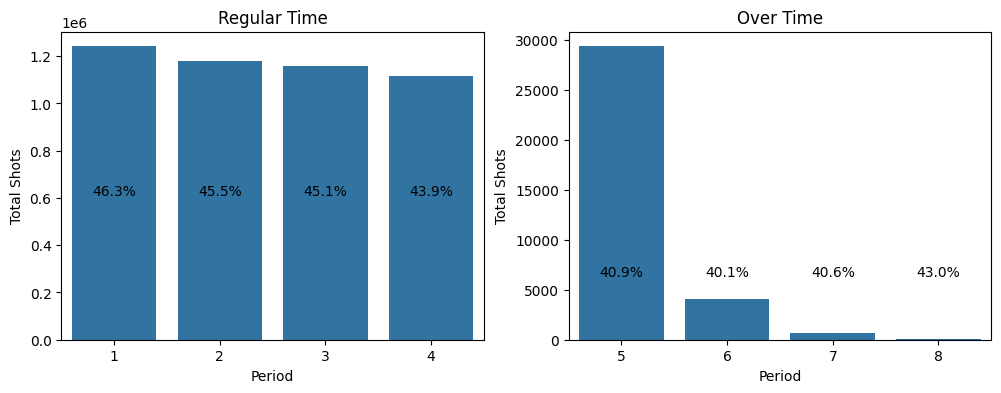

In [5]:
# Separate into regular and over time shots
df_regtime = df_shots[df_shots['Period'] <= 4]
df_overtime = df_shots[df_shots['Period'] > 4]

# Calculate total number of shots and shot accuracy per regular and over time period
regtime_shots = df_regtime.groupby('Period')['Shot Made Flag'].count()
overtime_shots = df_overtime.groupby('Period')['Shot Made Flag'].count()

# Create the figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of shots for regular time
sns.countplot(x='Period', data=df_regtime, ax=ax1)
ax1.set_title('Regular Time')
ax1.set_xlabel('Period')
ax1.set_ylabel('Total Shots')

# Add shot accuracy as text annotations for regular time
for i, count in enumerate(regtime_shots):
    made_shots = df_regtime[(df_regtime['Period'] == i + 1) & (df_regtime['Shot Made Flag'] == 1)].shape[0]
    accuracy = made_shots / count
    ax1.text(i, 600000, f'{round(accuracy*100,1)}%', ha='center', va='bottom', fontsize=10)

# Plot the count of shots for over time
sns.countplot(x='Period', data=df_overtime, ax=ax2)
ax2.set_title('Over Time')
ax2.set_xlabel('Period')
ax2.set_ylabel('Total Shots')

# Add shot accuracy as text annotations for over time
for i, count in enumerate(overtime_shots):
    made_shots = df_overtime[(df_overtime['Period'] == i + 5) & (df_overtime['Shot Made Flag'] == 1)].shape[0]
    accuracy = made_shots / count
    ax2.text(i, 6000, f'{round(accuracy*100,1)}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

- The period appears to affect the shot accuracy
- In regular time, as the periods advance, the number of shots and the shot accuracy decrease
- In over time, the number of shots clearly decreases as there are not always overtimes played, but the accuracy remains relatively constant. Apart from period 8, but it is a very rare situation.
- This variable could be grouped in 5 categories: P1, P2, P3, P4 and OT

In [6]:
# Define a function to group periods
def group_periods(period):
    if period <= 4:
        return str(period)
    else:
        return 'OT'

# Apply the function to the Period column and create a new column with the segmented periods
df_shots['Period Grouped'] = df_shots['Period'].apply(group_periods)
df_shots['Period Grouped'].unique()

array(['4', '1', '2', '3', 'OT'], dtype=object)

#### **Remaining Minutes**

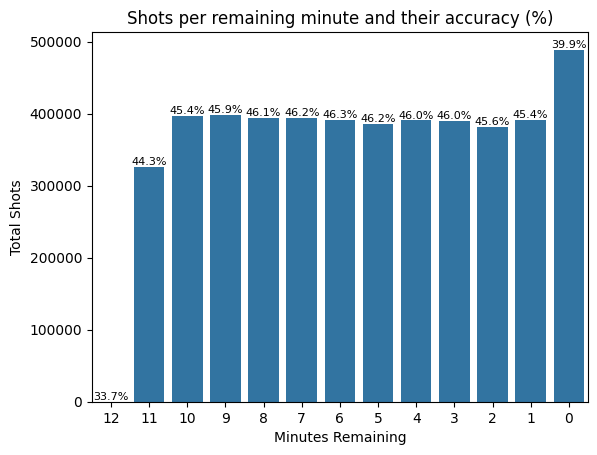

In [7]:
# Calculate shot accuracy, number of shots made, and number of shots missed for each minute remaining
shot_stats = df_shots.groupby('Minutes Remaining')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100

# Calculate total number of shots per remaining minute
total_shots = df_shots.groupby('Minutes Remaining')['Shot Made Flag'].count()

order = [12,11,10,9,8,7,6,5,4,3,2,1,0]
ax = sns.countplot(x = 'Minutes Remaining',
                   order = order,
                   data = df_shots)
ax.set_ylabel('Total Shots')
ax.set_title('Shots per remaining minute and their accuracy (%)')

total_shots_r = total_shots.sort_index(ascending=False)

# Add shot accuracy as text annotations
for i, acc in enumerate(reversed(shot_stats['accuracy'])):
    ax.text(i, total_shots_r[total_shots_r.index[i]],
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

- The remaining minutes appear to have a clear impact on the accuracy in the last minute.
- From minutes 10 to 1, the number of shots taken and the accuracy remain relatively constant.
- At minute 11, the number of shots is clearly lower and the accuracy gets a little bit reduced.
- At minute 0, there is a clear increase in the number of shots and a drop in the accuracy
- At minute 12, there are 101 shots, these seem to be an error as the periods have 12 minutes, and there should not be shots at this remaining time.
- In this scenario this variable can be grouped into 2 categories: last minute shots and suring the period shots

In [8]:
# Delete rows with 12 remaining minutes
df_shots = df_shots.drop(df_shots[df_shots['Minutes Remaining'] == 12].index)

# Define a function to group Minutes Remaining
def group_minutes_remaining(minutes):
    if minutes == 0:
      return 'last minute'
    else:
      return 'during the period'

# Apply the function to the Period column and create a new column with the segmented periods
df_shots['Minutes Remaining Grouped'] = df_shots['Minutes Remaining'].apply(group_minutes_remaining)
df_shots['Minutes Remaining Grouped'].unique()

array(['during the period', 'last minute'], dtype=object)

#### **Seconds Remaining**

(0.0, 60.0)

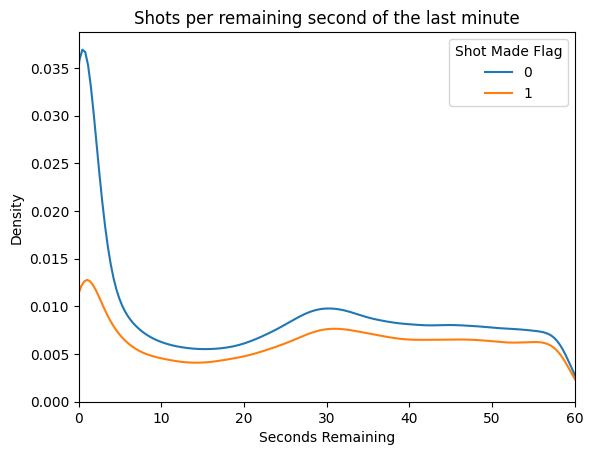

In [9]:
# Filter for shots taking place at the last minute of the period
df_shots_lm = df_shots[df_shots['Minutes Remaining'] == 0]

sns.kdeplot(x = 'Seconds Remaining', hue = 'Shot Made Flag', data = df_shots_lm)
plt.title('Shots per remaining second of the last minute')
plt.xlim(0,60)

- The remaining seconds of the last minute of the period has a clear impact on the shot accuracy
- Blue line represents missed shots and orange line represent made shots
- It is pretty clear that the number of shots has an exponential growth during the last 10 seconds while the accuracy clearly drops

#### **Action Type**

In [10]:
print('There are', df_shots['Action Type'].describe()[1], 'action types')
print(df_shots['Action Type'].unique())

There are 70 action types
['Jump Shot' 'Layup Shot' 'Driving Layup Shot' 'Tip Shot'
 'Running Jump Shot' 'Slam Dunk Shot' 'Dunk Shot' 'Driving Dunk Shot'
 'Hook Shot' 'No Shot' 'Turnaround Jump Shot' 'Reverse Layup Shot'
 'Running Layup Shot' 'Driving Finger Roll Shot' 'Alley Oop Dunk Shot'
 'Finger Roll Shot' 'Reverse Dunk Shot' 'Running Hook Shot'
 'Running Dunk Shot' 'Turnaround Hook Shot' 'Running Finger Roll Shot'
 'Driving Hook Shot' 'Running Tip Shot' 'Alley Oop Layup shot'
 'Turnaround Finger Roll Shot' 'Fadeaway Jump Shot' 'Jump Hook Shot'
 'Follow Up Dunk Shot' 'Jump Bank Shot' 'Hook Bank Shot'
 'Driving Finger Roll Layup Shot' 'Running Finger Roll Layup Shot'
 'Floating Jump shot' 'Putback Dunk Shot' 'Turnaround Fadeaway shot'
 'Running Reverse Layup Shot' 'Putback Layup Shot'
 'Finger Roll Layup Shot' 'Driving Slam Dunk Shot'
 'Driving Reverse Layup Shot' 'Pullup Jump shot' 'Running Bank shot'
 'Step Back Jump shot' 'Driving Jump shot' 'Reverse Slam Dunk Shot'
 'Driving Ban

/tmp/ipykernel_90362/3519139783.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are', df_shots['Action Type'].describe()[1], 'action types')


- 70 categories are too many, they should be grouped.
- One strategy could be to group them by key words
- Another strategy could be to group them by accuracy ranges

#### **Strategy 1**

/tmp/ipykernel_90362/2180054073.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


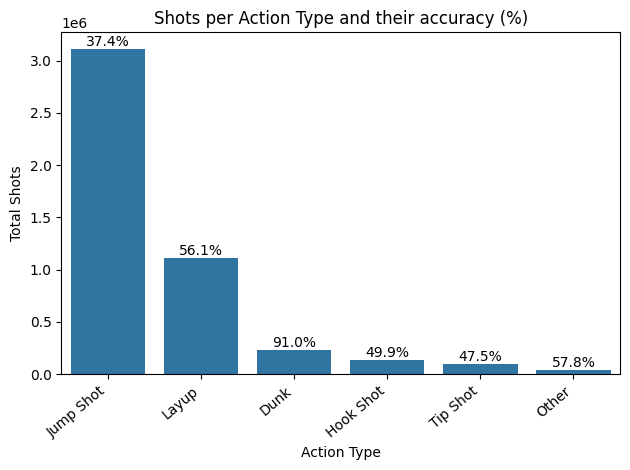

In [11]:
# Define a function to group Shot Type categories by type
def group_action_types(action_type):
    if 'Jump' in action_type:
        return 'Jump Shot'
    elif 'Dunk' in action_type:
        return 'Dunk'
    elif 'Tip' in action_type:
        return 'Tip Shot'
    elif 'Layup' in action_type or 'Finger Roll' in action_type:
        return 'Layup'
    elif 'Hook' in action_type:
        return 'Hook Shot'
    elif 'No Shot' in action_type:
        return 'No Shot'
    else:
        return 'Other'

# Apply the function to the Action Type column and create a new column with the grouped categories
df_shots['Action Type Grouped'] = df_shots['Action Type'].apply(group_action_types)

# Delete the category No Shot
df_shots = df_shots[df_shots['Action Type Grouped']!='No Shot']

# Calculate shot accuracy, number of shots made, and number of shots missed for action type
shot_stats = df_shots.groupby('Action Type Grouped')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100
shot_stats = shot_stats.sort_values(by='count', ascending = False)

# Calculate total number of shots per action type
total_shots = df_shots.groupby('Action Type Grouped')['Shot Made Flag'].count()

# Plot of the 10 most common action types
ax = sns.countplot(x = 'Action Type Grouped',
                   order = df_shots['Action Type Grouped'].value_counts().index,
                   data = df_shots)

total_shots_r = total_shots.value_counts().sort_index(ascending=False)

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, total_shots_r.index[i],
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=10)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Total Shots')
ax.set_xlabel('Action Type')
ax.set_title('Shots per Action Type and their accuracy (%)')
plt.tight_layout()
plt.show()


- The Action Type has an impact on the shot accuracy
- The most common action type is Jump Shot and it shows the lower accuracy
- Apart from Dunks, which accuracy is very high, the rest of action types accuracies oscillates around 50%, but Layups are more common than the rest

#### **Shot Type**

/tmp/ipykernel_90362/3924586433.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, 0.5 * total_shots[i],


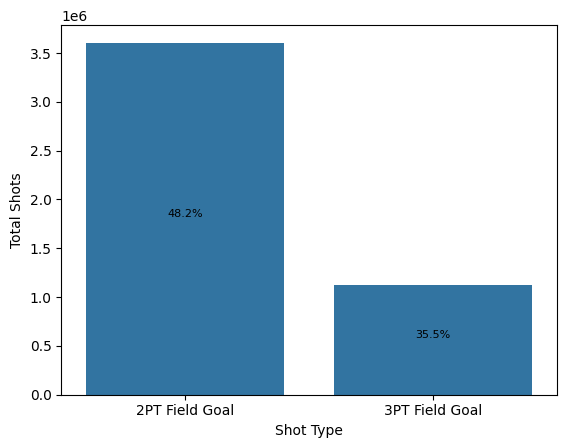

In [12]:
# Calculate shot accuracy, number of shots made, and number of shots missed for shot type
shot_stats = df_shots.groupby('Shot Type')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100

# Calculate total number of shots per Shot type
total_shots = df_shots.groupby('Shot Type')['Shot Made Flag'].count()

ax = sns.countplot(x = 'Shot Type', data = df_shots)
ax.set_ylabel('Total Shots')

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, 0.5 * total_shots[i],
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

- 2pt shots are more common and have higher accuracy than 3pt shots
- Here it is important to check if there are no strange values regarding the Shot Type and the Shot Zone Range or the Shot Zone Basic.

In [13]:
# group the data by Shot Zone Range and Shot Type
grouped = df_shots.groupby(['Shot Zone Range', 'Shot Type'])

# count the number of shots in each group
shot_counts = grouped['Game ID'].count()

# display the results
print(shot_counts)

Shot Zone Range  Shot Type     
16-24 ft.        2PT Field Goal     918441
                 3PT Field Goal       1523
24+ ft.          2PT Field Goal        389
                 3PT Field Goal    1110191
8-16 ft.         2PT Field Goal     749032
                 3PT Field Goal          8
Back Court Shot  2PT Field Goal         23
                 3PT Field Goal      11576
Less Than 8 ft.  2PT Field Goal    1937780
                 3PT Field Goal        170
Name: Game ID, dtype: int64


- There are some incoherent shots that should be eliminated

In [14]:
# Delete incoherent results
df_shots = df_shots[((df_shots['Shot Zone Basic'].str.contains('3')) | (df_shots['Shot Zone Basic'] == 'Backcourt')) & (df_shots['Shot Type'] == '3PT Field Goal') | (~(df_shots['Shot Zone Basic'].str.contains('3')) & (df_shots['Shot Zone Basic'] != 'Backcourt')) & (df_shots['Shot Type'] == '2PT Field Goal')]
grouped = df_shots.groupby(['Shot Zone Basic', 'Shot Type'])
shot_counts = grouped['Game ID'].count()
print(shot_counts)

Shot Zone Basic        Shot Type     
Above the Break 3      3PT Field Goal     828180
Backcourt              3PT Field Goal       9440
In The Paint (Non-RA)  2PT Field Goal     683659
Left Corner 3          3PT Field Goal     147018
Mid-Range              2PT Field Goal    1416034
Restricted Area        2PT Field Goal    1505560
Right Corner 3         3PT Field Goal     137129
Name: Game ID, dtype: int64


#### **Shot Zone Basic**

In [15]:
print('There are', df_shots['Shot Zone Basic'].describe()[1], 'basic shot zones')
print(df_shots['Shot Zone Basic'].unique())

There are 7 basic shot zones
['Mid-Range' 'In The Paint (Non-RA)' 'Left Corner 3' 'Right Corner 3'
 'Above the Break 3' 'Restricted Area' 'Backcourt']


/tmp/ipykernel_90362/4090881313.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are', df_shots['Shot Zone Basic'].describe()[1], 'basic shot zones')


/tmp/ipykernel_90362/373355334.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


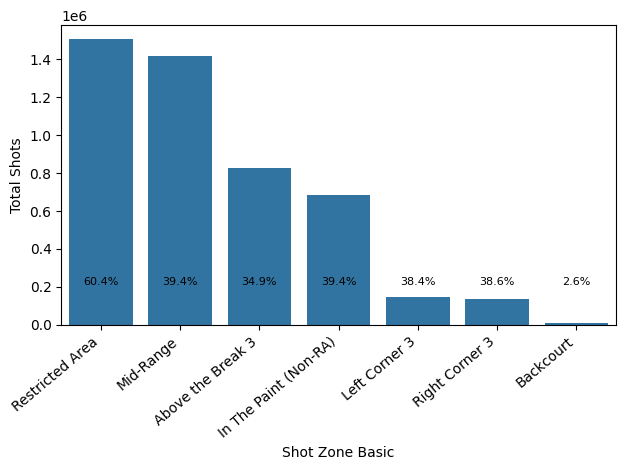

In [16]:
# Calculate shot accuracy, number of shots made, and number of shots missed for action type
shot_stats = df_shots.groupby('Shot Zone Basic')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100
shot_stats = shot_stats.sort_values(by='count', ascending = False)

# Calculate total number of shots per action type
total_shots = df_shots.groupby('Shot Zone Basic')['Shot Made Flag'].count()

ax = sns.countplot(x = 'Shot Zone Basic',
                   order = df_shots['Shot Zone Basic'].value_counts().index,
                   data = df_shots)

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, 200000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Total Shots')
plt.tight_layout()
plt.show()

- Shot Zone Basic has an impact in the accuracy and number of shots
- Restricted Area shots are very common and have a high accuracy but Mid Range shots, although they are common, their accuracy is low, as the rest of the shot zones
- The accuracy of Backcourt shots is very low as they are far from the basket

#### **Shot Zone Area**

In [17]:
print('There are', df_shots['Shot Zone Area'].describe()[1], 'shot zone areas')
print(df_shots['Shot Zone Area'].unique())

There are 6 shot zone areas
['Right Side(R)' 'Left Side(L)' 'Center(C)' 'Right Side Center(RC)'
 'Left Side Center(LC)' 'Back Court(BC)']


/tmp/ipykernel_90362/2722402779.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are', df_shots['Shot Zone Area'].describe()[1], 'shot zone areas')


/tmp/ipykernel_90362/1857708323.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


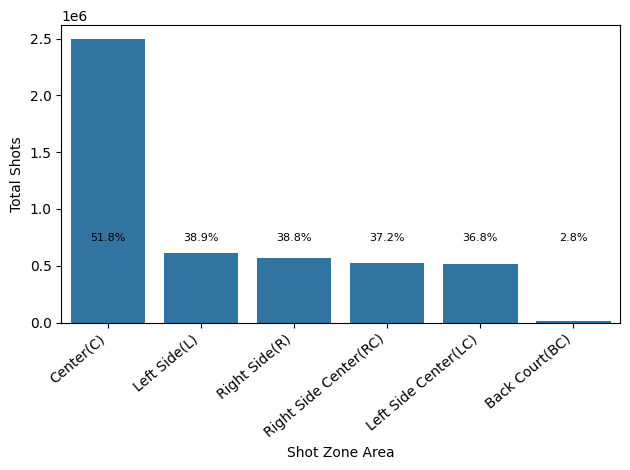

In [18]:
# Calculate shot accuracy, number of shots made, and number of shots missed for action type
shot_stats = df_shots.groupby('Shot Zone Area')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100
shot_stats = shot_stats.sort_values(by='count', ascending = False)

# Calculate total number of shots per action type
total_shots = df_shots.groupby('Shot Zone Area')['Shot Made Flag'].count()

ax = sns.countplot(x = 'Shot Zone Area',
                   order = df_shots['Shot Zone Area'].value_counts().index,
                   data = df_shots)

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, 700000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Total Shots')
plt.tight_layout()
plt.show()

- Shot Zone Area has an impact in the accuracy and number of shots
- Most common shots come from Center Zone with a higher accuracy than all the rest.
- The rest of the zones show a similar accuracy and numer of shots

#### **Shot Zone Range**

In [19]:
print('There are', df_shots['Shot Zone Range'].describe()[1], 'shot zone ranges')
print(df_shots['Shot Zone Range'].unique())

There are 5 shot zone ranges
['8-16 ft.' 'Less Than 8 ft.' '24+ ft.' '16-24 ft.' 'Back Court Shot']


/tmp/ipykernel_90362/565666770.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are', df_shots['Shot Zone Range'].describe()[1], 'shot zone ranges')


/tmp/ipykernel_90362/140467793.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


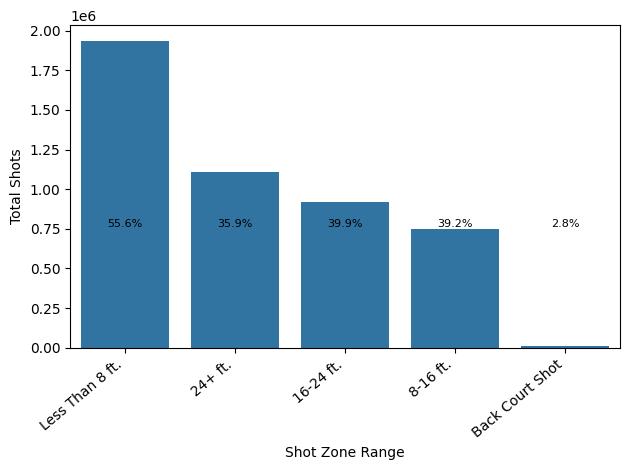

In [20]:
# Calculate shot accuracy, number of shots made, and number of shots missed for action type
shot_stats = df_shots.groupby('Shot Zone Range')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100
shot_stats = shot_stats.sort_values(by='count', ascending = False)

# Calculate total number of shots per action type
total_shots = df_shots.groupby('Shot Zone Range')['Shot Made Flag'].count()

ax = sns.countplot(x = 'Shot Zone Range',
                   order = df_shots['Shot Zone Range'].value_counts().index,
                   data = df_shots)

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, 750000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Total Shots')
plt.tight_layout()
plt.show()

- Shot Zone Range has an impact in the accuracy and number of shots
- Most part of the shots come from Less then 8 ft and show the highest accuracy
- A high number of 24 + ft shots are taken as they are 3 pointers

#### **Shot Distance**

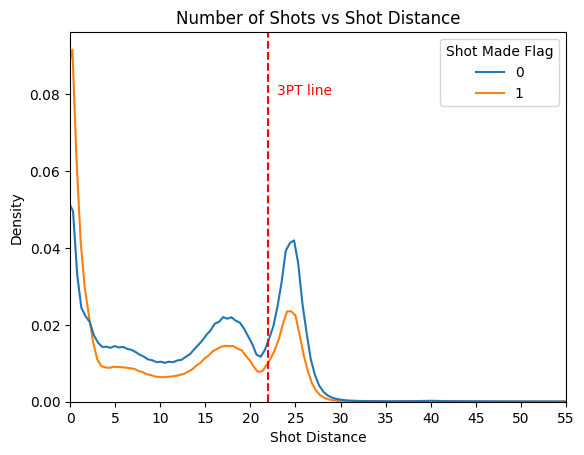

In [21]:
ax = sns.kdeplot(x='Shot Distance', hue='Shot Made Flag', data=df_shots, hue_order=[0, 1])
ax.set_xticks(range(0, 56, 5))
plt.title("Number of Shots vs Shot Distance")
plt.axvline(22, linestyle='--', color = 'red')
plt.text(23, 0.08, '3PT line', fontsize=10, color='red', ha='left')
plt.xlim(0,55)
plt.show()

- This plot shows similar info than the precedent bar plot but with continous values
- At short distances accuracy is high and it declines at long distances

#### **Game Date**

In [22]:
# Separating Game Date into new columns year, month and day
df_shots['Game Date'] = pd.to_datetime(df_shots['Game Date'], format='%Y%m%d')

df_shots['year'] = df_shots['Game Date'].dt.year
df_shots['month'] = df_shots['Game Date'].dt.month
df_shots['day'] = df_shots['Game Date'].dt.day

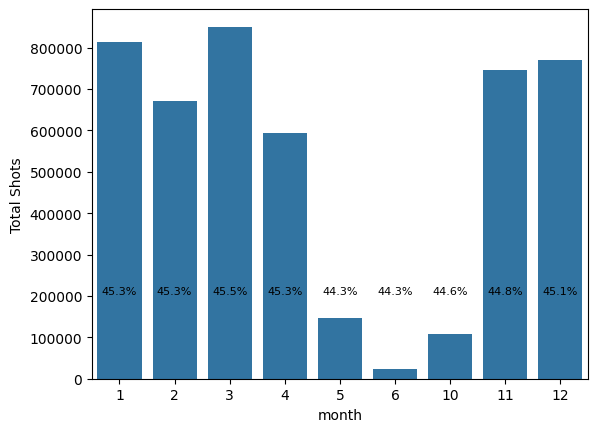

In [23]:
# Calculate shot accuracy, number of shots made, and number of shots missed for each minute remaining
shot_stats = df_shots.groupby('month')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100

# Calculate total number of shots per remaining minute
total_shots = df_shots.groupby('month')['Shot Made Flag'].count().reset_index(drop=True)

ax = sns.countplot(x = 'month', data = df_shots)
ax.set_ylabel('Total Shots')

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, 200000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)
plt.show()

- The month has not an impact on the shot accuracy, it remains around 45% always
- The difference in the number of shots comes from the different number of games played at those months

#### **Season Type**

/tmp/ipykernel_90362/191419959.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i, acc in enumerate(reversed(shot_stats['accuracy'])):


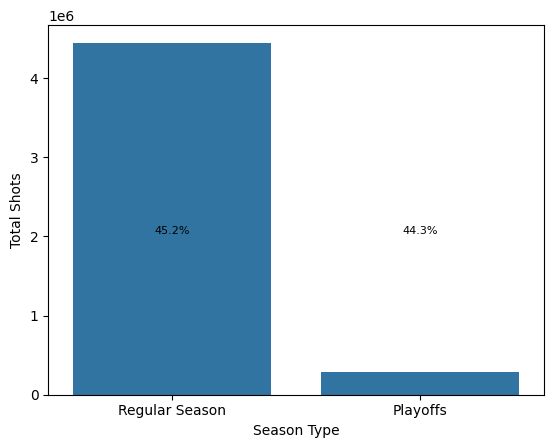

In [24]:
# Calculate shot accuracy, number of shots made, and number of shots missed for shot type
shot_stats = df_shots.groupby('Season Type')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100

# Calculate total number of shots per action type
total_shots = df_shots.groupby('Season Type')['Shot Made Flag'].count()

ax = sns.countplot(x = 'Season Type', data = df_shots)
ax.set_ylabel('Total Shots')

# Add shot accuracy as text annotations
for i, acc in enumerate(reversed(shot_stats['accuracy'])):
    ax.text(i, 2000000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

- The accuracy is very close in both Season types
- Of course there are less shots in Playoffs as there are less matches.

## **Interesting variables from other datasets**

### **Home or Away Team**

/tmp/ipykernel_90362/1102764111.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i, acc in enumerate(reversed(shot_stats['accuracy'])):


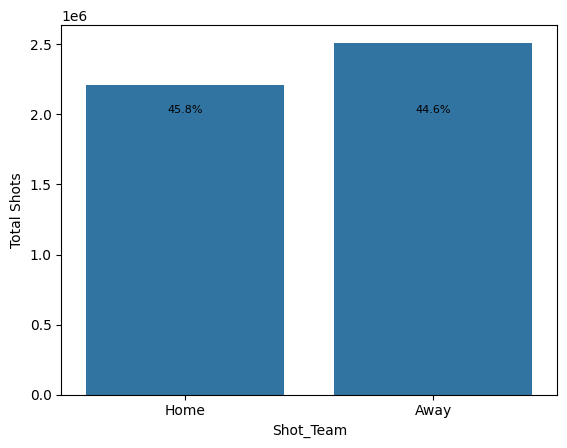

In [26]:
# Loading dataframe "teams"
df_teams = pd.read_csv('../data/teams.csv')

# Merge datasets
df_merged = pd.merge(df_shots, df_teams[['TEAM_ID', 'ABBREVIATION']], left_on='Team ID', right_on='TEAM_ID', how='left')

# Create new column to indicate whether shot was taken by home team or away team
df_merged['Shot_Team'] = df_merged.apply(lambda row: 'Home' if row['ABBREVIATION'] == row['Home Team'] else 'Away', axis=1)

# Calculate shot accuracy, number of shots made, and number of shots missed for shot type
shot_stats = df_merged.groupby('Shot_Team')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100

# Calculate total number of shots per action type
total_shots = df_merged.groupby('Shot_Team')['Shot Made Flag'].count()

ax = sns.countplot(x = 'Shot_Team', data = df_merged)
ax.set_ylabel('Total Shots')

# Add shot accuracy as text annotations
for i, acc in enumerate(reversed(shot_stats['accuracy'])):
    ax.text(i, 2000000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

- The away teams take more shots but their accuracy is a bit lower than the home teams

### **Age, height, weight and position of the player**

In [27]:
# Identify players with the same name but different IDs

player_doublon = df_shots.groupby(['Player Name']).nunique()['Player ID']
player_doublon = player_doublon[player_doublon.values > 1]
df_shots["doublon"] = np.where(df_shots["Player Name"].isin(player_doublon.index), 1, 0)
df_shot_doublons = df_shots[df_shots["doublon"]==1]

ID_1 = []
ID_2 = []

for nom in np.unique(df_shot_doublons['Player Name']) :
    ID_1.append(np.unique(df_shot_doublons[df_shot_doublons['Player Name']==nom]['Player ID'])[0])
    ID_2.append(np.unique(df_shot_doublons[df_shot_doublons['Player Name']==nom]['Player ID'])[1])

df_doublons = pd.DataFrame({'name' : np.unique(df_shot_doublons['Player Name']), 'ID_1' : ID_1, 'ID_2' : ID_2})

df_doublons

,name,ID_1,ID_2
0,Chris Johnson,202419,203187
1,Chris Wright,202874,203203
2,Dee Brown,244,200793
3,Glen Rice,779,203318
4,Marcus Williams,200766,201173
5,Mike James,2229,1628455
6,Patrick Ewing,121,201607
7,Steven Smith,120,200848
8,Tony Mitchell,203183,203502


In [29]:
# Loading players dataset
df_players = pd.read_csv('../data/player_data.csv')

# Dropping datas with not interest
df_players = df_players[(df_players['year_start']<2020) & (df_players['year_end']>1997)]

# Cleaning dataset
df_players = df_players.dropna()

# creating a column birth year
df_players['birth_year'] = pd.to_datetime(df_players['birth_date']).dt.year

# creating a column with a continous value of height
df_players[['height-ft', 'height-inch']] = df_players['height'].str.split('-', expand=True).astype('int')
df_players['height-inch'] = df_players['height-inch'] * 0.0833
df_players['height'] = round(df_players['height-ft'] + df_players['height-inch'], 2)
df_players = df_players.drop(['height-ft', 'height-inch'], axis=1)


In [30]:
# Creating new DataFrame "doublon_player_data" from player_data.csv in wich we'll add the ID's:
doublon_player_data = pd.DataFrame(df_players[df_players['name'].isin(player_doublon.index)])

# Sorting by ascending 'year_start' :
doublon_player_data = doublon_player_data.sort_values(['name', 'year_start'], axis=0, ascending=True).reset_index(drop=True)
print(doublon_player_data[['name', 'year_start', 'year_end', 'birth_date']])

               name  year_start  year_end          birth_date
0     Chris Johnson        2011      2013       July 15, 1985
1     Chris Johnson        2013      2016      April 29, 1990
2      Chris Wright        2012      2014  September 30, 1988
3      Chris Wright        2013      2013    November 4, 1989
4         Dee Brown        1991      2002   November 29, 1968
5         Dee Brown        2007      2009     August 17, 1984
6         Glen Rice        1990      2004        May 28, 1967
7         Glen Rice        2014      2015     January 1, 1991
8   Marcus Williams        2007      2010    December 3, 1985
9   Marcus Williams        2008      2009   November 18, 1986
10       Mike James        2002      2014       June 23, 1975
11       Mike James        2018      2018     August 18, 1990
12    Patrick Ewing        1986      2002      August 5, 1962
13    Patrick Ewing        2011      2011        May 20, 1984
14     Steven Smith        2007      2007      April 12, 1983
15    To

In [31]:
# Droping Steven Smith (as he's appearing only once) 
# and the 2 Tony Mitchell (as they came in NBA the same year and have only played one year). 
doublon_player_data = doublon_player_data.iloc[:-3,:]

# Adding ID_1 to the older player
# Adding ID_2 to the recent one
doublon_player_data['player_id'] = [202419, 203187, 202874, 203203, 244, 200793, 779, 203318, 200766, 201173, 2229, 1628455, 121, 201607]

# Dropping doublons in df_players
df_players = df_players[~df_players['name'].isin(player_doublon.index)]

# seperate datas with and without doublons before merging
df_shot1 = df_shots[~df_shots['Player Name'].isin(player_doublon.index)]
df_shot2 = df_shots[df_shots['Player Name'].isin(player_doublon.index)]

# Merging by name 'player_data' & 'df_shot1'. 
# Merging by ID 'doublon_player_data' & 'df_shot2'
# Concat df_shot1 & df_shot2

df1 = df_shot1.merge(df_players, left_on='Player Name', right_on='name', how='inner')

df2 = df_shot2.merge(doublon_player_data, left_on='Player ID', right_on='player_id', how='inner')
df2 = df2.drop('player_id', axis=1)

df = pd.concat([df1, df2], axis=0)
df = df.drop(['doublon', 'name', 'college'], axis=1)

# creating a column age
df['age'] = df['year'] - df['birth_year']

In [32]:
# Looking for outliers :
player_age_error = df[(df['age']<16) | (df['age']>45)]
player_age_error.groupby(['Player Name', 'Player ID'])['age'].agg('min', 'max')

Player Name     Player ID
Gary Payton     56           5
Glenn Robinson  299          3
Tim Hardaway    896          5
Name: age, dtype: int32

In [33]:
# Dropping outliers in df_players :
df_players = df_players.drop(index = [1626, 3146, 3430])

# Merging again
df1 = df_shot1.merge(df_players, left_on='Player Name', right_on='name', how='inner')
df = pd.concat([df1, df2], axis=0)
df = df.drop(['doublon', 'name', 'college'], axis=1)
df['birth_year'] = df['birth_date'].str[-4:]
df['birth_year'] = df['birth_year'].astype('int')
df['age'] = df['Game Date'].dt.year - df['birth_year']

df = df.drop(['year_start', 'year_end', 'birth_year'], axis=1)

#### **Age**

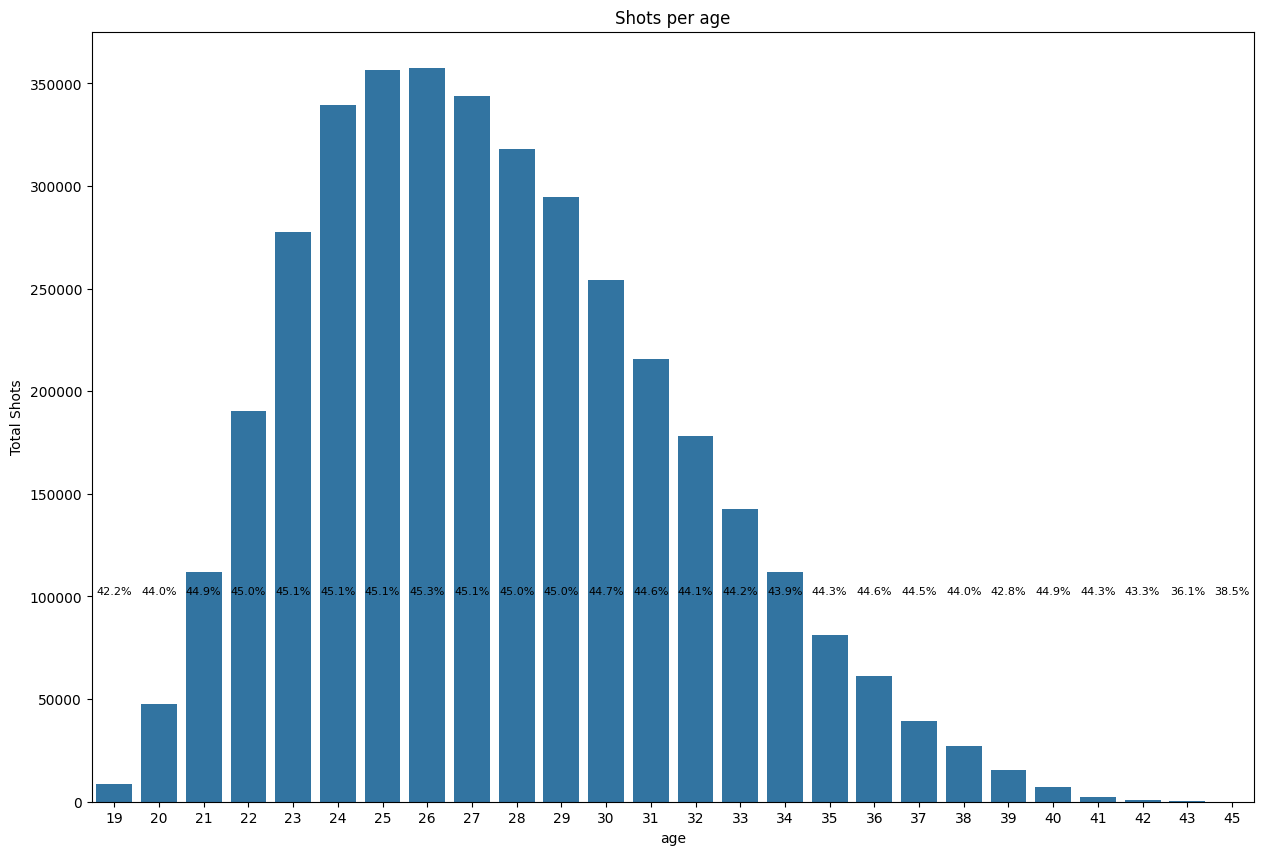

In [34]:
# Calculate shot accuracy, number of shots made, and number of shots missed for each height
age_stats = df.groupby('age')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
age_stats['accuracy'] = age_stats['mean']*100

# Calculate total number of shots and shot accuracy per height
age_shots = df.groupby('age')['Shot Made Flag'].count()

plt.figure(figsize = (15,10))

ax = sns.countplot(x = 'age', data = df)
ax.set_ylabel('Total Shots')
ax.set_title('Shots per age')

# Add shot accuracy as text annotations
for i, acc in enumerate(age_stats['accuracy']):
    ax.text(i, 100000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

#### **Height**

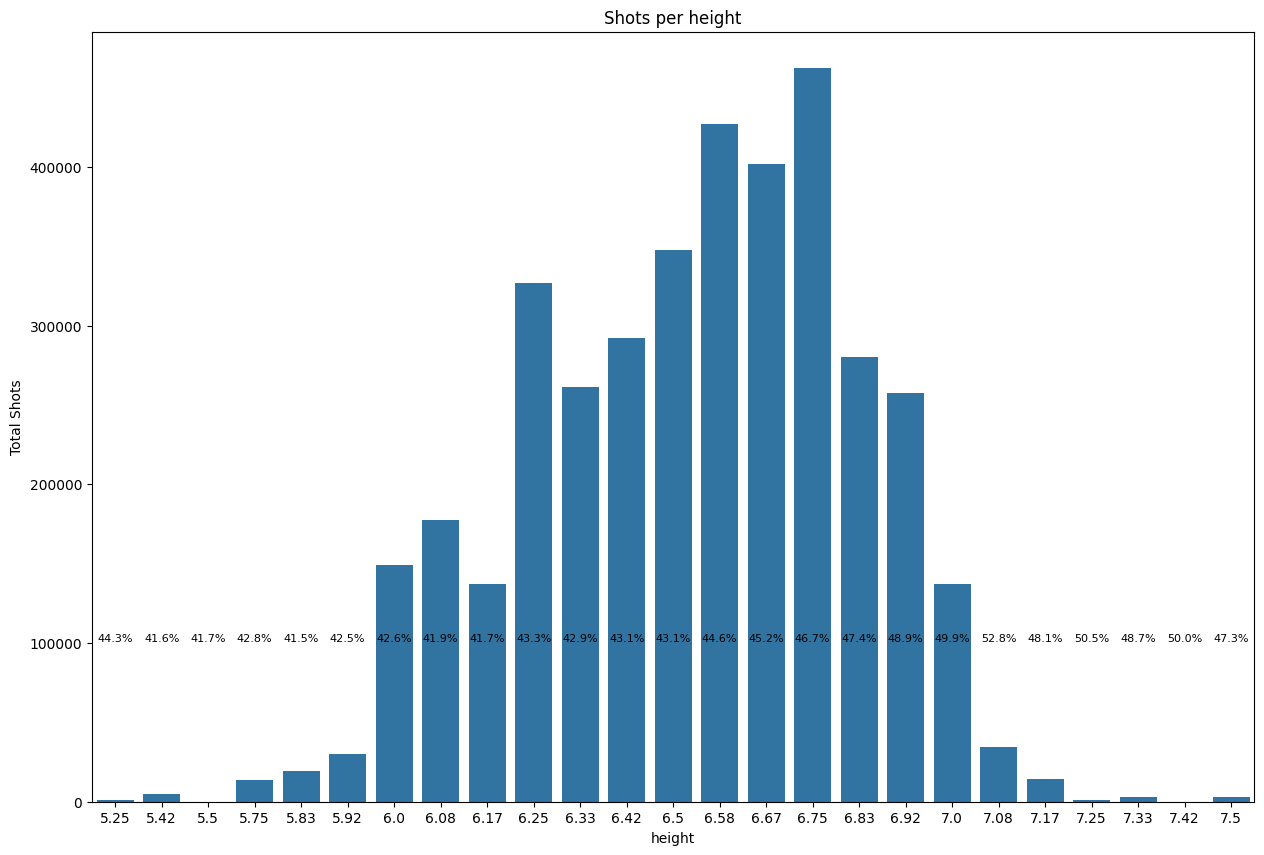

In [35]:
# Calculate shot accuracy, number of shots made, and number of shots missed for each height
height_stats = df.groupby('height')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
height_stats['accuracy'] = height_stats['mean']*100

# Calculate total number of shots and shot accuracy per height
height_shots = df.groupby('height')['Shot Made Flag'].count()

plt.figure(figsize = (15,10))

ax = sns.countplot(x = 'height', data = df)
ax.set_ylabel('Total Shots')
ax.set_title('Shots per height')

# Add shot accuracy as text annotations
for i, acc in enumerate(height_stats['accuracy']):
    ax.text(i, 100000,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

plt.show()

- There is an increase in the accuracy of the shots when the player's height is between 6.33ft and 7.08ft. At less than 6.33ft the accuracy varies around 42% while above 7.08ft the accuracy varies around 50%.

#### **Position**

/tmp/ipykernel_90362/2794184289.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


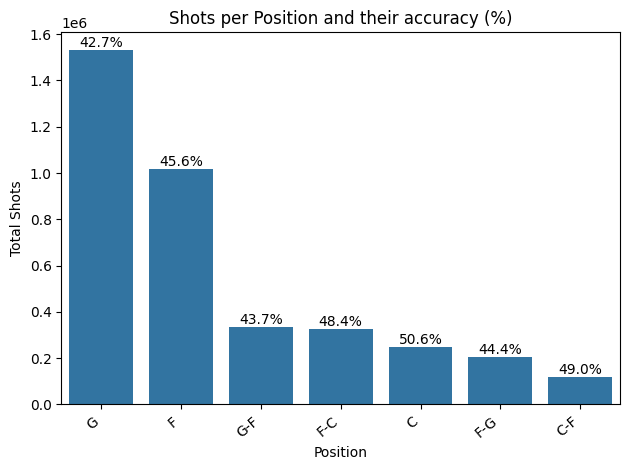

In [36]:
# Calculate shot accuracy, number of shots made, and number of shots missed for action type
shot_stats = df.groupby('position')['Shot Made Flag'].agg(['mean', 'sum', 'count'])
shot_stats['accuracy'] = shot_stats['mean'] * 100
shot_stats = shot_stats.sort_values(by='count', ascending = False)

# Calculate total number of shots per action type
total_shots = df.groupby('position')['Shot Made Flag'].count()

ax = sns.countplot(x = 'position',
                   order = df['position'].value_counts().index,
                   data = df)

total_shots_r = total_shots.value_counts().sort_index(ascending=False)

# Add shot accuracy as text annotations
for i, acc in enumerate(shot_stats['accuracy']):
    ax.text(i, total_shots_r.index[i],
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=10)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Total Shots')
ax.set_xlabel('Position')
ax.set_title('Shots per Position and their accuracy (%)')
plt.tight_layout()
plt.show()

#### **Weight**

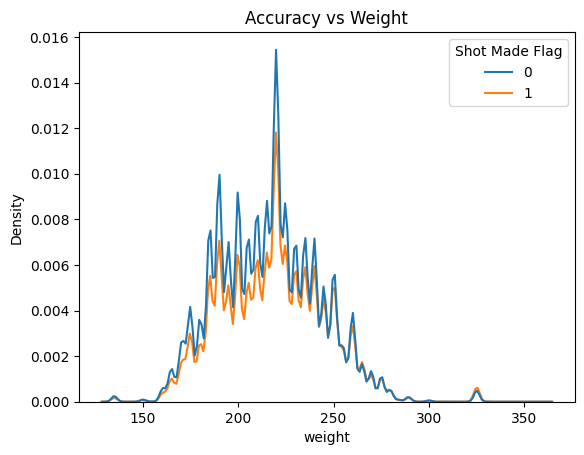

In [37]:
ax = sns.kdeplot(x='weight', hue='Shot Made Flag', data=df, hue_order=[0, 1])
plt.title("Accuracy vs Weight")
plt.show()

- We see an increase in accuracy (the blue and orange curves overlap) as the player gets heavier. This can be explained by the fact that heavier players usually play close to the basket.